# Sex

Shapefile: https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about

In [27]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

Clean up the csv

In [28]:
sex = pd.read_excel('../Data/Census_2023_AgeSexEstimates_forVA_0.xlsx', skiprows = 4)

In [29]:
sex.head()

,Locality,Locality FIPS Code,Total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,60 to 64 years .2,65 to 69 years .2,70 to 74 years .2,75 to 79 years .2,80 to 84 years .2,85 years and over .2,Under 18 years.2,18 to 64 years.2,18 years and over.2,65 years and over.2
0,Virginia,NaN,8715698,485946,523016,533403,568664,572124,568819,602468,...,284367,255460,211227,161581,102288,94940,916782,2667419,3492915,825496
1,Accomack County,1.0,33239,1708,1779,1990,1959,1614,1540,1792,...,1383,1561,1213,955,556,464,3289,8859,13608,4749
2,Albemarle County,3.0,115676,5520,6371,6191,9832,7484,7032,7348,...,3918,3957,3438,2613,1786,1980,10816,35538,49312,13774
3,Alleghany County,5.0,14595,547,724,784,809,736,827,769,...,577,605,489,458,287,277,1240,4069,6185,2116
4,Amelia County,7.0,13480,745,776,770,766,653,776,799,...,592,483,384,282,207,158,1317,3929,5443,1514


In [30]:
sex = sex.drop(0)
sex.head()

,Locality,Locality FIPS Code,Total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,60 to 64 years .2,65 to 69 years .2,70 to 74 years .2,75 to 79 years .2,80 to 84 years .2,85 years and over .2,Under 18 years.2,18 to 64 years.2,18 years and over.2,65 years and over.2
1,Accomack County,1.0,33239,1708,1779,1990,1959,1614,1540,1792,...,1383,1561,1213,955,556,464,3289,8859,13608,4749
2,Albemarle County,3.0,115676,5520,6371,6191,9832,7484,7032,7348,...,3918,3957,3438,2613,1786,1980,10816,35538,49312,13774
3,Alleghany County,5.0,14595,547,724,784,809,736,827,769,...,577,605,489,458,287,277,1240,4069,6185,2116
4,Amelia County,7.0,13480,745,776,770,766,653,776,799,...,592,483,384,282,207,158,1317,3929,5443,1514
5,Amherst County,9.0,31396,1571,1799,1729,1887,1902,1744,1922,...,1260,1127,987,769,566,466,2982,9416,13331,3915


In [31]:
gdf = gpd.read_file('../Data/VirginiaAdministrativeBoundary_ClippedToShoreline/VirginiaCounty_ClippedToShoreline.shp')
gdf.head()

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,51001,1480091,Accomack,Accomack County,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,51003,1675170,Albemarle,Albemarle County,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,51005,1492459,Alleghany,Alleghany County,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,51007,1497770,Amelia,Amelia County,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,51009,1480095,Amherst,Amherst County,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."


In [32]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace(' city', '')
    name = name.replace('town of ', '')
    name = name.replace(' town', '')
    return name

sex['Locality'] = sex['Locality'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [33]:
sex['Male Ratio'] = sex['Male'] / sex['Total']
sex['Male Ratio'][:5]

1    0.491651
2    0.480203
3    0.491264
4    0.498516
5    0.480412
Name: Male Ratio, dtype: float64

In [34]:
merged_gdf = sex.merge(gdf, left_on="Locality", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['Locality'])
merged_gdf

,Locality,Locality FIPS Code,Total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,accomack county,1.0,33239,1708,1779,1990,1959,1614,1540,1792,...,Accomack,accomack county,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,albemarle county,3.0,115676,5520,6371,6191,9832,7484,7032,7348,...,Albemarle,albemarle county,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,alleghany county,5.0,14595,547,724,784,809,736,827,769,...,Alleghany,alleghany county,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,amelia county,7.0,13480,745,776,770,766,653,776,799,...,Amelia,amelia county,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,amherst county,9.0,31396,1571,1799,1729,1887,1902,1744,1922,...,Amherst,amherst county,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,suffolk,800.0,100659,6158,6651,6655,6212,5705,6273,7495,...,Suffolk,suffolk,L,Y,2017/06/23,CI,428.933821,6.716418e+05,1.055535e+09,"MULTIPOLYGON (((262177.139 86912.233, 262177.0..."
129,virginia beach,810.0,453649,25943,27706,27606,26727,28297,32785,35340,...,Virginia Beach,virginia beach,L,Y,2017/01/25,CI,408.144012,1.350634e+06,6.461162e+08,"MULTIPOLYGON (((310101.26 66996.538, 310107.55..."
130,waynesboro,820.0,23182,1648,1463,1380,1360,1241,1606,1665,...,Waynesboro,waynesboro,L,Y,2014/06/16,CI,15.110987,3.244646e+04,3.913728e+07,"POLYGON ((52750.613 232999.672, 53088.146 2328..."
131,williamsburg,830.0,15847,433,520,532,2707,3446,914,708,...,Williamsburg,williamsburg,L,Y,2017/01/25,CI,9.032769,4.150800e+04,2.324663e+07,"MULTIPOLYGON (((247496.873 142380.179, 247499...."


In [47]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

In [48]:
#re-project to plate caree
merged_gdf = merged_gdf.to_crs("EPSG:32662")

In [42]:
print(gdf.crs)

PROJCS["Lambert_Conformal_Conic_Virginia",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",36],PARAMETER["central_meridian",-79.5],PARAMETER["standard_parallel_1",37],PARAMETER["standard_parallel_2",39.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


(4007538.308223417, 4007541.241692964)

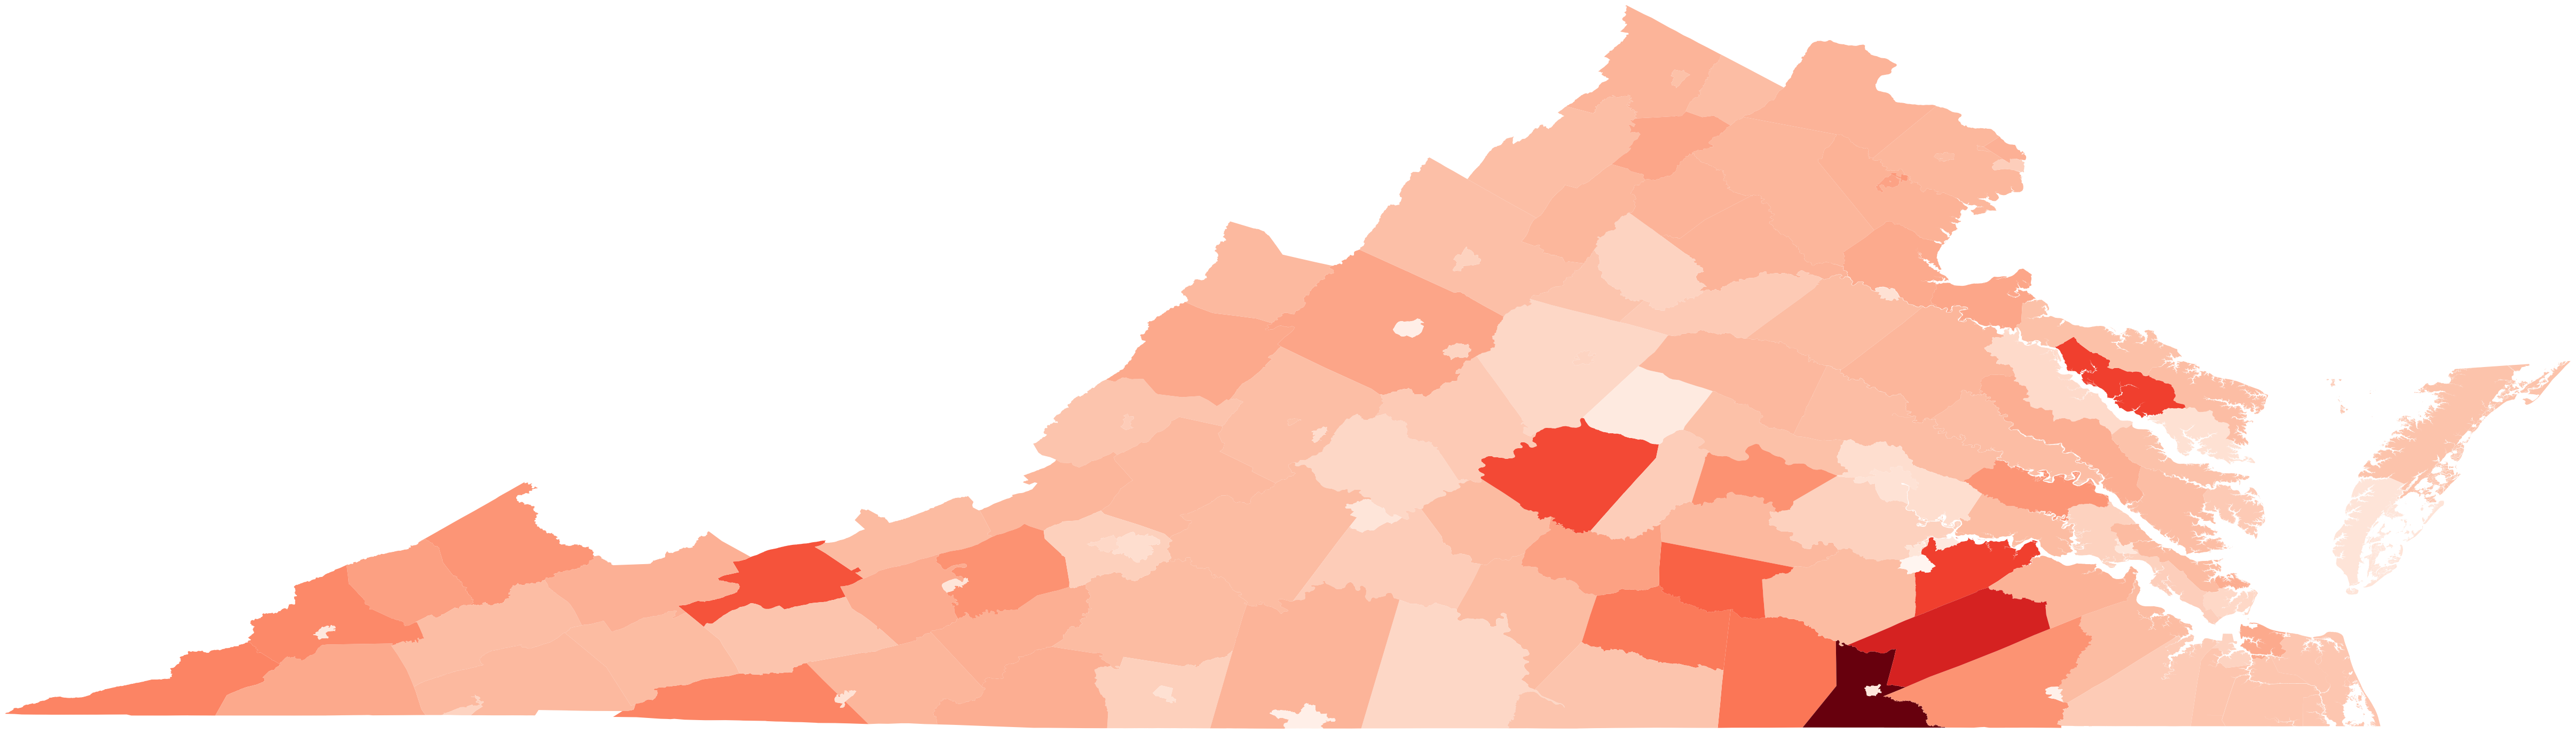

In [50]:
fig, ax = plt.subplots(figsize=(62, (6270 / 300)))
merged_gdf.plot(
    column='Male Ratio',
    cmap='Reds',
    legend=False,
    #edgecolor='black',
    ax=ax
)

ax.axis('off')
xmin, ymin, xmax, ymax = merged_gdf.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)